[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/02_Loss_Function_Comparison_MNIST.ipynb)

# Using Keras to recognize MNIST!(http://img1.imagilive.com/0717/mnist-sample.png)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [0]:
np.random.seed(2)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [4]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
sns.set(style='white', context='notebook', palette='deep')

## 2. Data Preprocessing

### 2.1 Load Data

In [13]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 76775041 bytes


In [14]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test.csv
User uploaded file "test.csv" with length 51118296 bytes


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
Y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

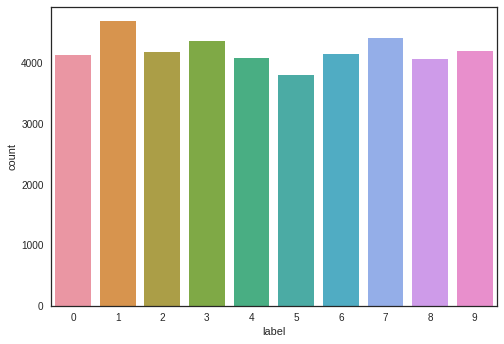

In [17]:
del train

g = sns.countplot(Y_train)

Y_train.value_counts()

### 2.2 Check for null and missing values

In [18]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [19]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

###2.3 Normalization

In [0]:
X_train = X_train /255.0
test = test /255.0

###2.4 Reshape

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

### 2.5 Label Encoding

In [0]:
Y_train = to_categorical(Y_train,num_classes=10)

### 2.6 Split training and validation set

In [0]:
random_seed = 2

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=0.1, random_state=random_seed)

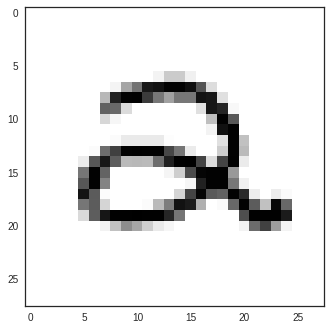

In [25]:
g = plt.imshow(X_train[12][:,:,0])

## 3. Convolutional Neural Networks

### 3.1 Define the model

In [0]:
model_1 = Sequential()

model_1.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model_1.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same',activation='relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))


model_1.add(Conv2D(filters=64,kernel_size=(3,3), padding='Same',activation='relu'))
model_1.add(Conv2D(filters=64,kernel_size=(3,3), padding='Same',activation='relu'))
model_1.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_1.add(Dropout(0.25))


model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

In [0]:
optimizer = RMSprop(lr=0.001,rho=0.9,epsilon=1e-8,decay=0.0)

In [0]:
model_1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           factor=0.5,
                                           patience=3,
                                           verbose=1,
                                           min_lr = 0.00001)

In [0]:
epochs = 30
batch_size = 256

### 3.2 Data Augmentation

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False)

datagen.fit(X_train)

In [35]:
history_1 = model_1.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                             epochs=epochs, validation_data=(X_val,Y_val),
                             verbose=2, steps_per_epoch=X_train.shape[0] // batch_size,
                             callbacks=[learning_rate_reduction])

Epoch 1/30
 - 12s - loss: 0.6782 - acc: 0.7771 - val_loss: 0.1040 - val_acc: 0.9667
Epoch 2/30
 - 10s - loss: 0.1736 - acc: 0.9469 - val_loss: 0.0511 - val_acc: 0.9852
Epoch 3/30
 - 10s - loss: 0.1174 - acc: 0.9649 - val_loss: 0.0377 - val_acc: 0.9890
Epoch 4/30
 - 10s - loss: 0.0922 - acc: 0.9716 - val_loss: 0.0335 - val_acc: 0.9890
Epoch 5/30
 - 10s - loss: 0.0802 - acc: 0.9759 - val_loss: 0.0358 - val_acc: 0.9883
Epoch 6/30
 - 10s - loss: 0.0696 - acc: 0.9793 - val_loss: 0.0303 - val_acc: 0.9921
Epoch 7/30
 - 10s - loss: 0.0633 - acc: 0.9811 - val_loss: 0.0256 - val_acc: 0.9919
Epoch 8/30
 - 10s - loss: 0.0559 - acc: 0.9825 - val_loss: 0.0209 - val_acc: 0.9926
Epoch 9/30
 - 10s - loss: 0.0538 - acc: 0.9839 - val_loss: 0.0226 - val_acc: 0.9919
Epoch 10/30
 - 10s - loss: 0.0528 - acc: 0.9845 - val_loss: 0.0213 - val_acc: 0.9940
Epoch 11/30
 - 10s - loss: 0.0487 - acc: 0.9856 - val_loss: 0.0236 - val_acc: 0.9924
Epoch 12/30
 - 10s - loss: 0.0477 - acc: 0.9863 - val_loss: 0.0202 - val_a

In [0]:
model_3 = Sequential()

model_3.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model_3.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same',activation='relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))
model_3.add(Dropout(0.25))


model_3.add(Conv2D(filters=64,kernel_size=(3,3), padding='Same',activation='relu'))
model_3.add(Conv2D(filters=64,kernel_size=(3,3), padding='Same',activation='relu'))
model_3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_3.add(Dropout(0.25))


model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

In [0]:
model_3.compile(optimizer=optimizer, loss='squared_hinge',metrics=['accuracy'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           factor=0.5,
                                           patience=3,
                                           verbose=1,
                                           min_lr = 0.00001)

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False)

datagen.fit(X_train)

In [45]:
history_3 = model_3.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                             epochs=epochs, validation_data=(X_val,Y_val),
                             verbose=2, steps_per_epoch=X_train.shape[0] // batch_size,
                             callbacks=[learning_rate_reduction])

Epoch 1/30
 - 10s - loss: 0.9741 - acc: 0.2210 - val_loss: 0.9496 - val_acc: 0.5305
Epoch 2/30
 - 10s - loss: 0.9508 - acc: 0.4476 - val_loss: 0.9269 - val_acc: 0.6924
Epoch 3/30
 - 10s - loss: 0.9406 - acc: 0.5450 - val_loss: 0.9194 - val_acc: 0.7779
Epoch 4/30
 - 10s - loss: 0.9347 - acc: 0.6100 - val_loss: 0.9154 - val_acc: 0.8255
Epoch 5/30
 - 10s - loss: 0.9303 - acc: 0.6586 - val_loss: 0.9120 - val_acc: 0.8681
Epoch 6/30
 - 10s - loss: 0.9260 - acc: 0.7053 - val_loss: 0.9096 - val_acc: 0.8919
Epoch 7/30
 - 11s - loss: 0.9221 - acc: 0.7503 - val_loss: 0.9079 - val_acc: 0.9102
Epoch 8/30
 - 10s - loss: 0.9187 - acc: 0.7867 - val_loss: 0.9067 - val_acc: 0.9238
Epoch 9/30
 - 10s - loss: 0.9160 - acc: 0.8197 - val_loss: 0.9055 - val_acc: 0.9367
Epoch 10/30
 - 10s - loss: 0.9136 - acc: 0.8443 - val_loss: 0.9047 - val_acc: 0.9450
Epoch 11/30
 - 10s - loss: 0.9123 - acc: 0.8585 - val_loss: 0.9044 - val_acc: 0.9495
Epoch 12/30
 - 10s - loss: 0.9111 - acc: 0.8722 - val_loss: 0.9039 - val_a

In [0]:
model_2 = Sequential()

model_2.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model_2.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same',activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))


model_2.add(Conv2D(filters=64,kernel_size=(3,3), padding='Same',activation='relu'))
model_2.add(Conv2D(filters=64,kernel_size=(3,3), padding='Same',activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Dropout(0.25))


model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

In [0]:
model_2.compile(optimizer=optimizer, loss='mse',metrics=['accuracy'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           factor=0.5,
                                           patience=3,
                                           verbose=1,
                                           min_lr = 0.00001)

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False)

datagen.fit(X_train)

In [55]:
history_2 = model_2.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                             epochs=epochs, validation_data=(X_val,Y_val),
                             verbose=2, steps_per_epoch=X_train.shape[0] // batch_size,
                             callbacks=[learning_rate_reduction])

Epoch 1/30
 - 10s - loss: 0.0854 - acc: 0.2647 - val_loss: 0.0654 - val_acc: 0.5924
Epoch 2/30
 - 10s - loss: 0.0667 - acc: 0.4805 - val_loss: 0.0368 - val_acc: 0.7650
Epoch 3/30
 - 10s - loss: 0.0546 - acc: 0.5893 - val_loss: 0.0264 - val_acc: 0.8448
Epoch 4/30
 - 11s - loss: 0.0447 - acc: 0.6810 - val_loss: 0.0184 - val_acc: 0.8871
Epoch 5/30
 - 10s - loss: 0.0363 - acc: 0.7455 - val_loss: 0.0136 - val_acc: 0.9174
Epoch 6/30
 - 10s - loss: 0.0296 - acc: 0.7969 - val_loss: 0.0109 - val_acc: 0.9317
Epoch 7/30
 - 10s - loss: 0.0251 - acc: 0.8296 - val_loss: 0.0091 - val_acc: 0.9407
Epoch 8/30
 - 10s - loss: 0.0213 - acc: 0.8575 - val_loss: 0.0082 - val_acc: 0.9474
Epoch 9/30
 - 10s - loss: 0.0191 - acc: 0.8721 - val_loss: 0.0075 - val_acc: 0.9514
Epoch 10/30
 - 10s - loss: 0.0173 - acc: 0.8851 - val_loss: 0.0067 - val_acc: 0.9569
Epoch 11/30
 - 10s - loss: 0.0160 - acc: 0.8932 - val_loss: 0.0064 - val_acc: 0.9590
Epoch 12/30
 - 10s - loss: 0.0149 - acc: 0.9010 - val_loss: 0.0059 - val_a

In [0]:
model_4 = Sequential()

model_4.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model_4.add(Conv2D(filters=32, kernel_size=(5,5),padding='Same',activation='relu'))
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))


model_4.add(Conv2D(filters=64,kernel_size=(3,3), padding='Same',activation='relu'))
model_4.add(Conv2D(filters=64,kernel_size=(3,3), padding='Same',activation='relu'))
model_4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_4.add(Dropout(0.25))


model_4.add(Flatten())
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(10, activation='softmax'))

In [0]:
model_4.compile(optimizer=optimizer, loss='hinge',metrics=['accuracy'])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           factor=0.5,
                                           patience=3,
                                           verbose=1,
                                           min_lr = 0.00001)

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,
                            vertical_flip=False)

datagen.fit(X_train)

In [61]:
history_4 = model_4.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                             epochs=epochs, validation_data=(X_val,Y_val),
                             verbose=2, steps_per_epoch=X_train.shape[0] // batch_size,
                             callbacks=[learning_rate_reduction])

Epoch 1/30
 - 11s - loss: 0.9847 - acc: 0.2063 - val_loss: 0.9609 - val_acc: 0.5224
Epoch 2/30
 - 11s - loss: 0.9607 - acc: 0.4290 - val_loss: 0.9357 - val_acc: 0.6669
Epoch 3/30
 - 11s - loss: 0.9495 - acc: 0.5210 - val_loss: 0.9279 - val_acc: 0.7317
Epoch 4/30
 - 11s - loss: 0.9441 - acc: 0.5730 - val_loss: 0.9245 - val_acc: 0.7636
Epoch 5/30
 - 11s - loss: 0.9403 - acc: 0.6088 - val_loss: 0.9211 - val_acc: 0.7955
Epoch 6/30
 - 11s - loss: 0.9368 - acc: 0.6452 - val_loss: 0.9171 - val_acc: 0.8348
Epoch 7/30
 - 11s - loss: 0.9334 - acc: 0.6757 - val_loss: 0.9149 - val_acc: 0.8576
Epoch 8/30
 - 11s - loss: 0.9306 - acc: 0.7054 - val_loss: 0.9126 - val_acc: 0.8814
Epoch 9/30
 - 11s - loss: 0.9281 - acc: 0.7291 - val_loss: 0.9109 - val_acc: 0.8960
Epoch 10/30
 - 11s - loss: 0.9254 - acc: 0.7559 - val_loss: 0.9098 - val_acc: 0.9074
Epoch 11/30
 - 11s - loss: 0.9233 - acc: 0.7766 - val_loss: 0.9085 - val_acc: 0.9226
Epoch 12/30
 - 11s - loss: 0.9211 - acc: 0.8000 - val_loss: 0.9074 - val_a

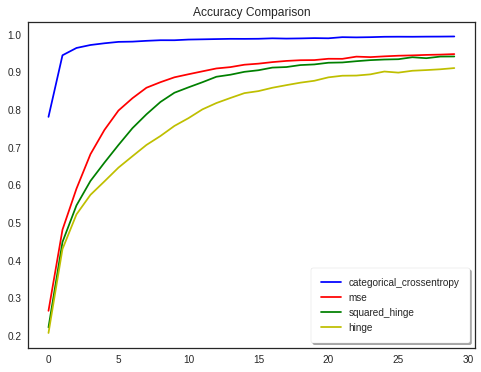

In [81]:
plt.figure(figsize=(8,6))
plt.plot(history_1.history['acc'],color='b',label='categorical_crossentropy')
plt.plot(history_2.history['acc'],color='r',label='mse')
plt.plot(history_3.history['acc'],color='g',label='squared_hinge')
plt.plot(history_4.history['acc'],color='y',label='hinge')
#plt.legend(loc='best')
leg = plt.legend()
plt.legend(frameon=True,fancybox=True, framealpha=1, shadow=True, borderpad=1)
#leg.get_frame().set_edgecolor('b')
plt.title('Accuracy Comparison')
plt.show()

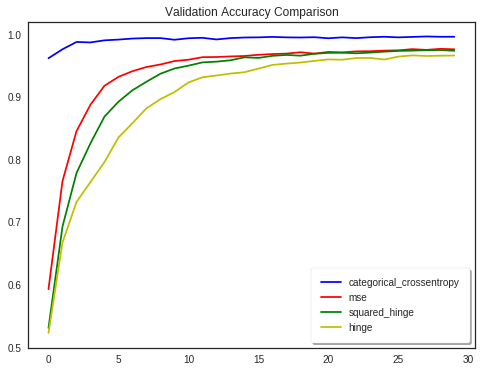

In [82]:
plt.figure(figsize=(8,6))
plt.plot(history_1.history['val_acc'],color='b',label='categorical_crossentropy')
plt.plot(history_2.history['val_acc'],color='r',label='mse')
plt.plot(history_3.history['val_acc'],color='g',label='squared_hinge')
plt.plot(history_4.history['val_acc'],color='y',label='hinge')
leg = plt.legend()
plt.legend(frameon=True,fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Validation Accuracy Comparison')
plt.show()